In [1]:
from sympy import *
from sympy.vector import Vector
from sympy.vector import CoordSys3D

k, l, a, b = symbols( 'k l a b', positive=True, integer=True)
r, s = symbols('r s', positive=True, real=True)
n, m, d = symbols( 'n m d', positive=True, integer=True, finite=True)
x, y = symbols('x y', positive=True)
L = symbols('L', positive=True)

init_printing(use_unicode=True)

def Euler(n,d):    
    return simplify(factor( (n + d + 1)*(d + 1) ) )


def ProdEuler(n,m,d):    
    return simplify(factor( Rational(1, 6) * (d + 1) * (d + 2) * (d**2 + 2*(d*n + d*m) + 3*(d + n*m  + n + m + 1) ) ))

def Diff(n,m,d):
    return factor( ( Euler(n,d) * Euler(m,d) ) - ProdEuler(n,m,d) )

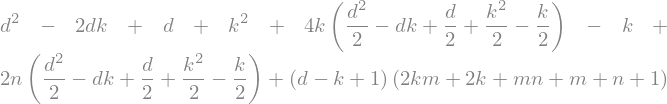

In [3]:
Sum((n + 2*k + 1)*(m + 2*l + 1), (l,0,d-k)).doit()

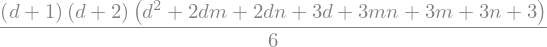

In [5]:
factor( Sum( Sum((n + 2*k + 1)*(m + 2*l + 1), (l,0,d-k)).doit(), (k, 0, d) ).doit() )

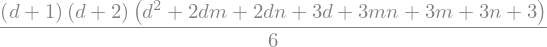

In [7]:
ProdEuler(n,m,d)

In [2]:
def CotangentSum(x,y,d):
    return Sum( Sum( (x**a)*(y**b), (b,0,d-a) ), (a,0,d) )

def DoItCotangentSum(x,y,d):
    return Sum( Sum( (x**a)*(y**b), (b,0,d-a) ), (a,0,d) ).doit()

def InfSum(x,y,r,s):
    return Sum( Sum( ( (x**r)*(y**s) ), (r,0,oo) ), (s,0,oo) )

def DoItInfSum(x,y,r,s):
    return Sum( Sum( ( (x**r)*(y**s) ), (r,0,oo) ).doit(), (s,0,oo) ).doit()

def SumFactor(x,y,r,s):
    return (x**r)*(y**s)

def CotangentFactor(x,y,a,b):
    return (x**a)*(y**b)

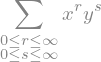

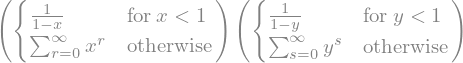

In [33]:
display(InfSum(x,y, r, s))
display(InfSum(x,y, r, s).doit())

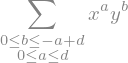

In [105]:
display(CotangentSum(x,y,d))

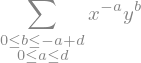

In [108]:
CotangentSum(x**(-1),y,d)

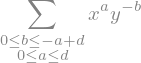

In [107]:
CotangentSum(x,y**(-1),d)

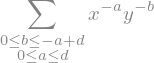

In [106]:
CotangentSum(x**(-1),y**(-1),d)

In [57]:
def P12(x,y,r,s,a,b):
    return SumFactor(x,y,r,s) * CotangentFactor(x,y,-a,-b)

def P23(x,y,n,m,r,s):
    return (x**n) * SumFactor(x,y,-r,s) * CotangentFactor(x,y,a,-b)

def P34(x,y,n,m,r,s):
    return (x**n) * (y**m) * SumFactor(x,y,-r,-s) * CotangentFactor(x,y,a,b)

def P14(x,y,n,m,r,s):
    return (y**m) * SumFactor(x,y,r,-s) * CotangentFactor(x,y,-a,b)

#def DoItP12(x,y,n,m,d,r,s):
#    return ( DoItCotangentSum(x**(-1), y**(-1), d) ) * ( 1 / ( ( 1 - x )*( 1 - y ) ) )

#def DoItP23(x,y,n,m,d,r,s):
#    return (x**n) * ( DoItCotangentSum(x, y**(-1), d) ) * ( 1 / ( ( 1 - x**(-1) )*( 1 - y ) ) ) 

#def DoItP34(x,y,n,m,d,r,s):
#    return (x**n) * (y**m) * ( DoItCotangentSum(x, y, d) ) * ( 1 / ( ( 1 - x**(-1) )*( 1 - y**(-1) ) ) )

#def DoItP14(x,y,n,m,d,r,s):
#    return (y**m) * ( DoItCotangentSum(x**(-1), y, d) ) * ( 1 / ( ( 1 - x )*( 1 - y**(-1) ) ) ) 
 

In [3]:
display(SumFactor(x,y,r,s) * CotangentFactor(x,y,-a,-b))
display((x**n) * SumFactor(x,y,-r,s) * CotangentFactor(x,y,a,-b))
display((x**n) * (y**m) * SumFactor(x,y,-r,-s) * CotangentFactor(x,y,a,b))
display((y**m) * SumFactor(x,y,r,-s) * CotangentFactor(x,y,-a,b))

NameError: name 's' is not defined

In [8]:
def Terms(x,y,n,m,d,r,s):
    return ( SumFactor(x,y,r,s) * CotangentFactor(x,y,-a,-b) ) + ( (x**n) * SumFactor(x,y,-r,s) * CotangentFactor(x,y,a,-b) ) + ( (x**n) * (y**m) * SumFactor(x,y,-r,-s) * CotangentFactor(x,y,a,b) ) + ( (y**m) * SumFactor(x,y,r,-s) * CotangentFactor(x,y,-a,b) )

Terms(x,y,n,m,d,r,s)

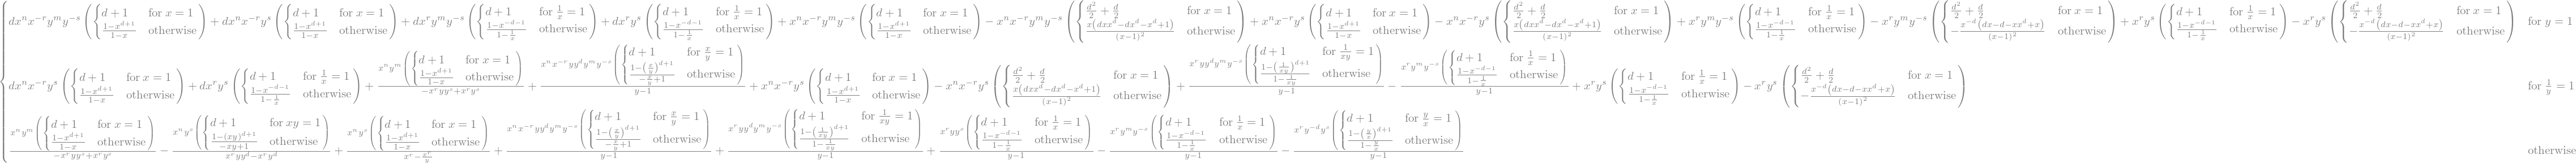

In [74]:
def PointTerms(x,y,n,m,d,r,s):
    return ( Sum( Sum( Terms(x,y,n,m,d,r,s) , (b,0,d-a) ), (a,0,d) ) )

def DoItPointTerms(x,y,n,m,d,r,s):
    return ( Sum( Sum( Terms(x,y,n,m,d,r,s) , (b,0,d-a) ).doit(), (a,0,d) ) ).doit()

DoItPointTerms(x,y,n,m,d,r,s)

In [100]:
def CharacterSum(x,y,n,m,d):
    return ( Sum( Sum( PointTerms(x,y,n,m,d,r,s) , (r,0,oo) ), (s,0,oo) ) )

def DoItCharacterSum(x,y,n,m,d):
    return ( Sum( Sum( PointTerms(x,y,n,m,d,r,s).doit() , (r,0,oo) ), (s,0,oo) ).doit() )

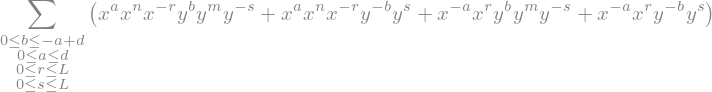

In [91]:
CharacterSum(x,y,n,m,d,L)

In [11]:
def FullSum(x,y,d):
    return Sum( Sum( Sum( Sum( Terms(x,y,n,m,d,r,s) , (b,0,d-a) ), (a,0,d) ), (r,0,oo) ), (s, 0, oo) )

def DoItFullSum(x,y,d):
    return Sum( Sum( Sum( Sum( Terms(x,y,n,m,d,r,s) , (b,0,d-a) ).doit(), (a,0,d) ).doit(), (r,0,oo) ).doit(), (s, 0, oo) ).doit()

In [17]:
limit(FullSum(x,y,d), x, 1)

NotImplementedError: Don't know how to calculate the mrv of 'Sum(y**(-b + s)*(1 + 1/x)**(-a + r) + y**(-b + s)*(1 + 1/x)**(a + n - r) + y**(b + m - s)*(1 + 1/x)**(-a + r) + y**(b + m - s)*(1 + 1/x)**(a + n - r), (b, 0, -a + d), (a, 0, d), (r, 0, oo), (s, 0, oo))'

In [12]:
DoItFullSum(x,y,d)

ValueError: The argument 'zoo' is not comparable.